**Forecasting for dataset A**

Firstly loading the dataset and code where preprocessing steps were done



In [28]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Technical Programming Final Exam/WA_Fn-UseC_-HR-Employee-Attrition.csv")


from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Check for missing values
missing_values = data.isnull().sum()


#Check for duplicates
duplicates = data.duplicated().sum()


# 3. Ensure correct data types (converting 'Attrition' and 'BusinessTravel' to category)
data['Attrition'] = data['Attrition'].astype('category')
data['BusinessTravel'] = data['BusinessTravel'].astype('category')

# 4. Encoding categorical variables using LabelEncoder
encoder = LabelEncoder()

# Encode the 'Attrition' column
data['Attrition'] = encoder.fit_transform(data['Attrition'])

# Encode other categorical columns as needed
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# 5. Feature scaling (using StandardScaler)
scaler = StandardScaler()
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'HourlyRate', 'JobLevel',
                     'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
                     'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                     'YearsWithCurrManager']

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# 6. Handling outliers (optional, depends on distribution - here we'll use IQR method)
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data = data[~((data[numerical_columns] < (Q1 - 1.5 * IQR)) |(data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Output the processed data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,1.322365,0,1,-1.297775,1,-0.147150,-1.868426,1,1,-1.699621,...,4,80,1,-0.164511,0.155707,3,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,2,1.414363,1,-0.887515,-0.891688,4,1,-1.696298,...,2,80,0,-0.550208,0.155707,3,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,1,-0.764121,1.061787,1,1,-1.694636,...,3,80,0,-0.421642,0.155707,3,0.161947,0.764998,0.252146,-1.155935
5,-0.539166,0,1,0.502054,1,-0.887515,-0.891688,1,1,-1.689652,...,3,80,0,-0.421642,-0.620189,2,-0.001333,0.764998,0.252146,0.526188
6,2.417384,0,2,1.292887,1,-0.764121,0.085049,3,1,-1.686328,...,1,80,3,0.092620,0.155707,2,-0.981014,-1.167687,-0.679146,-1.155935


**Forecasting for Dataset A with Arima Model**

In [29]:
from prophet import Prophet

<ipython-input-30-c03f8282997e>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='2018-01-01', periods=60, freq='M'),
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


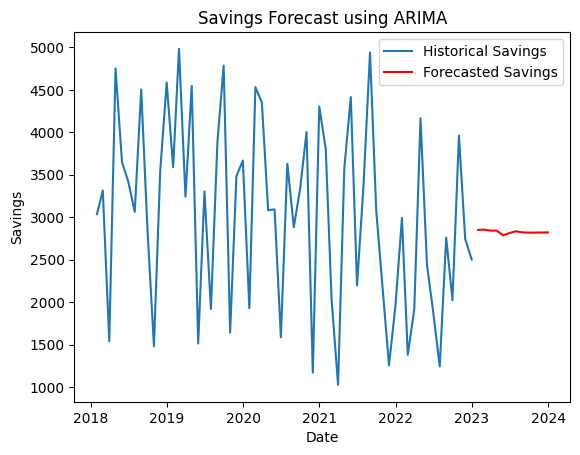

In [30]:

import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Sample DataFrame (replace with actual aggregated savings data)
# Ensure your data has been aggregated to a time series format with `date` and `savings` columns.
data = {
    'date': pd.date_range(start='2018-01-01', periods=60, freq='M'),
    'savings': [np.random.randint(1000, 5000) for _ in range(60)]  # Example savings data
}

df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# Fit ARIMA model
model = ARIMA(df['savings'], order=(5, 1, 0))  # You might need to adjust these parameters
model_fit = model.fit()

# Make forecast
forecast = model_fit.forecast(steps=12)  # Forecast for the next 12 months

# Plot the results
plt.plot(df['savings'], label='Historical Savings')
plt.plot(forecast, label='Forecasted Savings', color='red')
plt.legend()
plt.title('Savings Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Savings')
plt.show()


**Forecasting for dataset b**

Firstly loading the second dataset and code where preprocessing steps were done



In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data2 = pd.read_excel("/content/drive/MyDrive/Technical Programming Final Exam/Par_Data for Logistic Regression.xlsx")

# Step 1: Reset the index to ensure we can access the first row
data2.reset_index(drop=True, inplace=True)

# Step 2: Drop the first two rows (one may be a header-like row)
data2 = data2.iloc[2:]

# Step 3: Print the number of columns to check the correct number
print(f"Number of columns: {len(data2.columns)}")


# Step 5: Drop the unnecessary first column (if it's still there)
data2.drop(columns=data2.columns[0], inplace=True)

# Step 6: Assign the correct column names
data2.columns = ['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months', 'Credit_History', 'Purpose_Credit_Taken',
                 'Credit_Amount', 'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income', 'Sex_Marital_Status',
                 'Guarantors', 'Duration_in_Residence', 'Property', 'Age', 'Other_Inst_Plans', 'Housing', 'Num_CC',
                 'Job', 'Dependents', 'Telephone', 'Foreign_Worker', 'Default_On_Payment', 'Count']


# Step 8: Define categorical columns
categorical_columns = ['Status_Checking_Acc', 'Credit_History', 'Purpose_Credit_Taken', 'Savings_Acc',
                       'Years_At_Present_Employment', 'Sex_Marital_Status', 'Guarantors', 'Property',
                       'Other_Inst_Plans', 'Housing', 'Job', 'Telephone', 'Foreign_Worker', 'Default_On_Payment']

# Step 9: Convert categorical columns to 'category' type
for col in categorical_columns:
    data2[col] = data2[col].astype('category')

# Step 10: Encode categorical variables using LabelEncoder
encoder = LabelEncoder()
for col in categorical_columns:
    data2[col] = encoder.fit_transform(data2[col])

# Step 11: Scaling the numerical features
scaler = StandardScaler()

# Define numerical columns
numerical_columns = ['Duration_in_Months', 'Credit_Amount', 'Inst_Rt_Income', 'Duration_in_Residence', 'Age', 'Num_CC', 'Dependents']

# Scale the numerical columns
data2[numerical_columns] = scaler.fit_transform(data2[numerical_columns])

# Step 12: Handle outliers using IQR (optional)
Q1 = data2[numerical_columns].quantile(0.25)
Q3 = data2[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers based on IQR
data2 = data2[~((data2[numerical_columns] < (Q1 - 1.5 * IQR)) | (data2[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the processed dataset

data2.head()

Number of columns: 24


,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purpose_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Sex_Marital_Status,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
8,100007,3,0.256953,2,3,-0.154629,2,4,0.024147,2,...,1.535122,2,1,-0.704926,2,-0.42829,0,0,0,1
9,100008,1,1.252574,2,1,1.303197,0,2,-0.870183,2,...,-0.048022,2,0,-0.704926,3,-0.42829,1,0,0,1
10,100009,3,-0.738668,2,4,-0.075233,3,3,-0.870183,0,...,2.238742,2,1,-0.704926,1,-0.42829,0,0,0,1
11,100010,1,0.754763,4,0,0.695681,0,0,0.918477,3,...,-0.663689,2,1,1.027079,3,-0.42829,0,0,1,1
12,100011,1,-0.738668,2,0,-0.700472,0,1,0.024147,1,...,-0.927547,2,0,-0.704926,2,-0.42829,0,0,1,1


**Forecasting Dataset B with Fc Prophet Model**

In [32]:
# Step 1: Reset the index to ensure we can access the first row
data2.reset_index(drop=True, inplace=True)

# Step 2: Drop the first two rows (one may be a header-like row)
data2 = data2.iloc[2:]

# Step 5: Drop the unnecessary first column (if it's still there)
data2.drop(columns=data2.columns[0], inplace=True)

# Step 6: Assign the correct column names
data2.columns = ['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months', 'Credit_History', 'Purpose_Credit_Taken',
                 'Credit_Amount', 'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income', 'Sex_Marital_Status',
                 'Guarantors', 'Duration_in_Residence', 'Property', 'Age', 'Other_Inst_Plans', 'Housing', 'Num_CC',
                 'Job', 'Dependents', 'Telephone', 'Foreign_Worker', 'Default_On_Payment']

# Assuming you have a date column. For demonstration, we will create a Date column.
# This assumes the dataset records are in chronological order.
data2['Date'] = pd.date_range(start='2020-01-01', periods=len(data2))

# Step 2: Aggregate Credit_Amount by month
monthly_data = data2.groupby(data2['Date'].dt.to_period("M")).agg({'Credit_Amount': 'sum'}).reset_index()

# Rename columns for Prophet
monthly_data.columns = ['ds', 'y']

# Display the prepared dataset for Prophet
print(monthly_data.head())

        ds   y
0  2020-01  34
1  2020-02  38
2  2020-03  41
3  2020-04  26
4  2020-05  29


**Implementing Prophet**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4fjbyote/bljo4gil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4fjbyote/l3nkkeha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22935', 'data', 'file=/tmp/tmp4fjbyote/bljo4gil.json', 'init=/tmp/tmp4fjbyote/l3nkkeha.json', 'output', 'file=/tmp/tmp4fjbyote/prophet_modelasu4gjad/prophet_model-20241017121309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:13:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:13:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

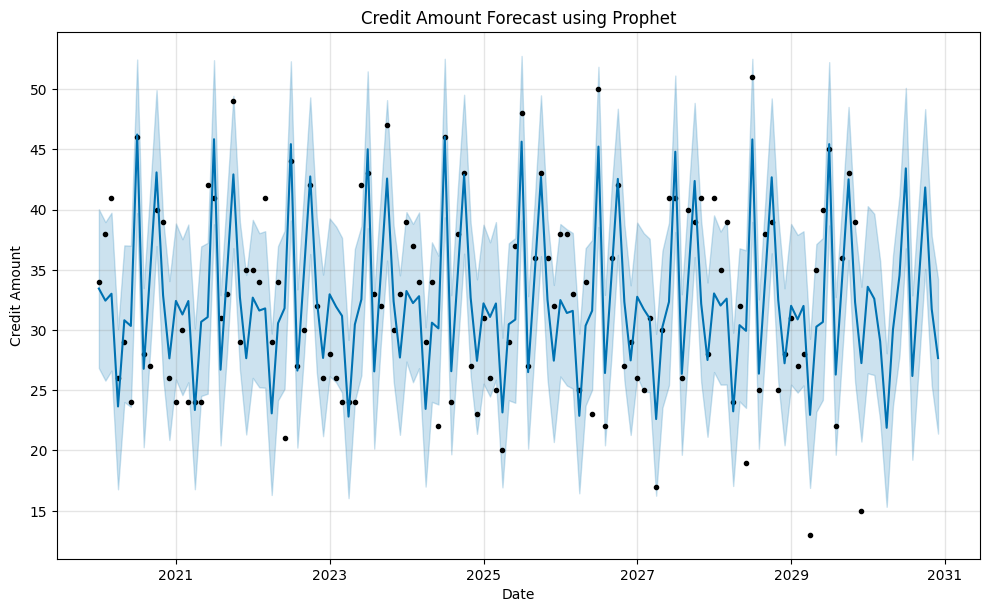

In [33]:
# Create the 'Date' column and aggregate by month
data2['Date'] = pd.date_range(start='2020-01-01', periods=len(data2))
monthly_data = data2.groupby(data2['Date'].dt.to_period("M")).agg({'Credit_Amount': 'sum'}).reset_index()
monthly_data.columns = ['ds', 'y']

# Convert the 'ds' column to datetime
monthly_data['ds'] = monthly_data['ds'].dt.to_timestamp()

# Initialize and fit the Prophet model
model = Prophet()
model.fit(monthly_data)

# Create a DataFrame for future dates
future = model.make_future_dataframe(periods=12, freq='M')  # Forecast for the next 12 months

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Credit Amount Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Credit Amount')
plt.show()
